In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from wordcloud import WordCloud

In [3]:
df= pd.read_csv('pizza_sales.csv')
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616.0,21348.0,ckn_alfredo_m,1.0,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617.0,21348.0,four_cheese_l,1.0,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618.0,21348.0,napolitana_s,1.0,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619.0,21349.0,mexicana_l,1.0,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [5]:
# Checking for null values

print(df.isnull().sum())   # Rows

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64


In [6]:
print(df[df.isna().any(axis=1)])   # Columns

Empty DataFrame
Columns: [pizza_id, order_id, pizza_name_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name]
Index: []


In [7]:
# Calculating total revenue

df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [8]:
# Total Revenue

total_revenue = sum(df["total_price"])
total_revenue

817860.049999993

In [9]:
# Detemining the most sold pizza type by size
# Zipped the pizza name and total price 

most_sold = list(zip(df["pizza_name"], df["total_price"]))
most_sold

[('The Hawaiian Pizza', 13.25),
 ('The Classic Deluxe Pizza', 16.0),
 ('The Five Cheese Pizza', 18.5),
 ('The Italian Supreme Pizza', 20.75),
 ('The Mexicana Pizza', 16.0),
 ('The Thai Chicken Pizza', 20.75),
 ('The Italian Supreme Pizza', 16.5),
 ('The Prosciutto and Arugula Pizza', 20.75),
 ('The Italian Supreme Pizza', 16.5),
 ('The Italian Supreme Pizza', 16.5),
 ('The Barbecue Chicken Pizza', 12.75),
 ('The Greek Pizza', 12.0),
 ('The Spinach Supreme Pizza', 12.5),
 ('The Spinach Supreme Pizza', 12.5),
 ('The Classic Deluxe Pizza', 12.0),
 ('The Green Garden Pizza', 12.0),
 ('The Italian Capocollo Pizza', 20.5),
 ('The Italian Supreme Pizza', 20.75),
 ('The Italian Supreme Pizza', 12.5),
 ('The Mexicana Pizza', 12.0),
 ('The Spicy Italian Pizza', 20.75),
 ('The Spinach Pesto Pizza', 20.75),
 ('The Vegetables + Vegetables Pizza', 12.0),
 ('The Mexicana Pizza', 20.25),
 ('The Southwest Chicken Pizza', 20.75),
 ('The Barbecue Chicken Pizza', 20.75),
 ('The California Chicken Pizza', 

In [10]:
# Listing the pizza varieties

variety = df["pizza_name"].value_counts()
variety

pizza_name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Spicy Italian Pizza                       1887
The Sicilian Pizza                            1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza     

In [11]:
# Checking the number of unique varieties

print(len(df["pizza_name"].value_counts())) 

32


In [12]:
unitprize = df["unit_price"]

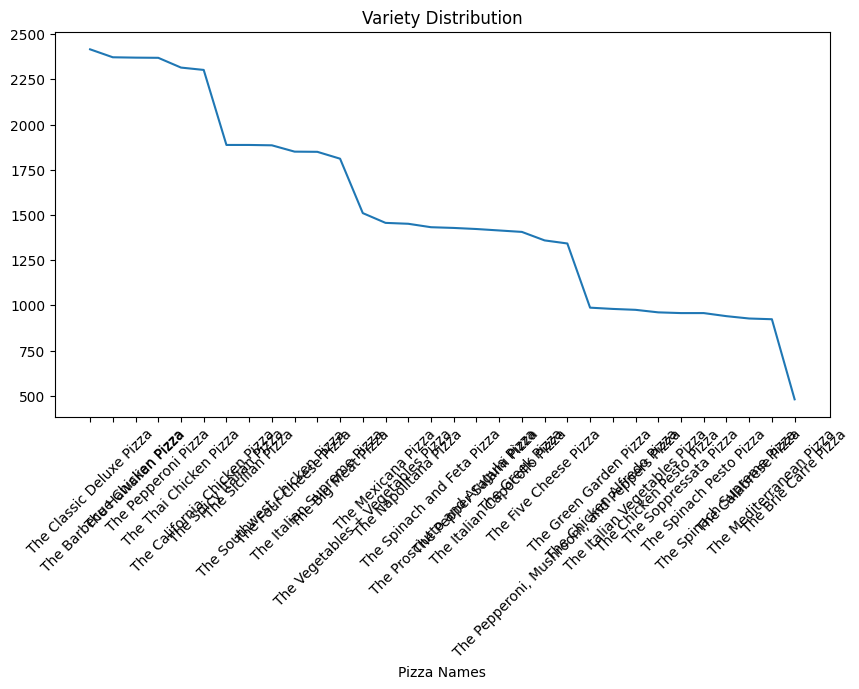

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(variety)

plt.title("Variety Distribution")
plt.xlabel("Pizza Names")
plt.xticks(rotation=45)
# plt.legend()

plt.show()

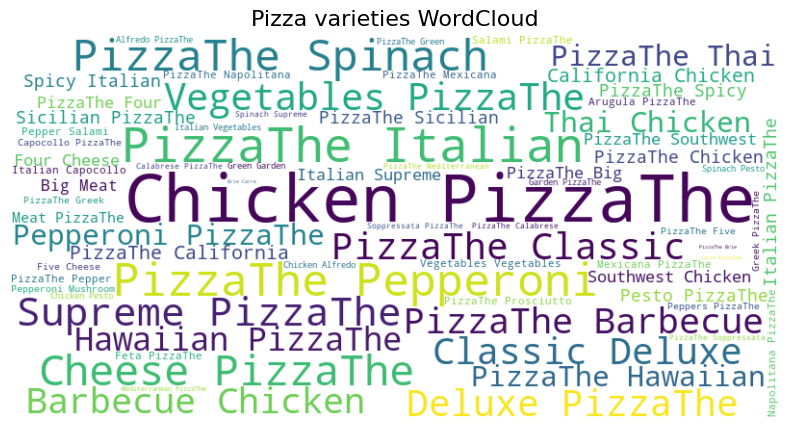

In [14]:

# Generating a wordcloud
text = "".join(df["pizza_name"].astype(str))

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot with Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Pizza varieties WordCloud', fontsize=16)
plt.show()


In [15]:
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616.0,21348.0,ckn_alfredo_m,1.0,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617.0,21348.0,four_cheese_l,1.0,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618.0,21348.0,napolitana_s,1.0,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619.0,21349.0,mexicana_l,1.0,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [16]:
df = df.drop(columns= ["pizza_id"], axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           48620 non-null  float64
 1   pizza_name_id      48620 non-null  object 
 2   quantity           48620 non-null  float64
 3   order_date         48620 non-null  object 
 4   order_time         48620 non-null  object 
 5   unit_price         48620 non-null  float64
 6   total_price        48620 non-null  float64
 7   pizza_size         48620 non-null  object 
 8   pizza_category     48620 non-null  object 
 9   pizza_ingredients  48620 non-null  object 
 10  pizza_name         48620 non-null  object 
dtypes: float64(4), object(7)
memory usage: 4.1+ MB


In [20]:
# Determining the time most people order
# Group pizza name, order time, unit prce
ordertime = df["order_time"]

In [24]:
t1 = []
t2 = []
t3 = []
t4 = []
t5 = []
t6 = []
t7 = []

for x in ordertime:
    if  x >= "11:30:00" and x <= "12:59:59":
        t1.append(x)
    if  x >= "13:00:00" and x <= "14:59:59":
        t2.append(x)
    if  x >= "15:00:00" and x <= "16:59:59":
        t3.append(x)
    if  x >= "17:00:00" and x <= "18:59:59":
        t4.append(x)
    if  x >= "19:00:00" and x <= "20:59:59":
        t5.append(x)
    if  x >= "21:00:00" and x <= "22:59:59":
        t6.append(x)
    if  x >= "23:00:00" and x <= "24:59:59":
        t7.append(x)

In [29]:
ordertime_data = pd.DataFrame({
    "Time" : ["From 11:30 to 12:59", "From 13:00 to 14:59", "From 15:00 to 16:59", "From 17:00 to 18:59", "From 19:00 to 20:59", "From 21:00 to 22:59", "From 23:00 to 23:59"],
    "Number of Orders" : [len(t1), len(t2), len(t3), len(t4), len(t5), len(t6), len(t7)]
})

In [30]:
ordertime_data

,Time,Number of Orders
0,From 11:30 to 12:59,8716
1,From 13:00 to 14:59,9724
2,From 15:00 to 16:59,7355
3,From 17:00 to 18:59,10502
4,From 19:00 to 20:59,7837
5,From 21:00 to 22:59,3898
6,From 23:00 to 23:59,68


From the data we can conclude that:
1. Orders are made most between 5pm and 7pm 
2. Least ordered time is between 11pm and 12am

In [31]:
ordertime_data.describe()

,Number of Orders
count,7.000000
mean,6871.428571
std,3674.568993
min,68.000000
25%,5626.500000
50%,7837.000000
75%,9220.000000
max,10502.000000


In [ ]:
ordertime = pd.to_datetime(ordertime, format="%H:%M:%S")
print(ordertime.head())


0   1900-01-01 11:38:36
1   1900-01-01 11:57:40
2   1900-01-01 11:57:40
3   1900-01-01 11:57:40
4   1900-01-01 11:57:40
Name: order_time, dtype: datetime64[ns]
